In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
data = pd.read_csv("/Users/zhouzhirui/Desktop/dataset/gk_clean_plus.csv",
                   parse_dates=["datetime"], date_parser=pd.to_datetime)
data = data.groupby(data.datetime)["pwr"].sum()["2018-07-01": "2018-07-31"]

In [127]:
data[:5]

datetime
2018-07-01 00:00:00    715.0
2018-07-01 00:30:00    755.0
2018-07-01 01:00:00    795.0
2018-07-01 01:30:00    615.0
2018-07-01 02:00:00    705.0
Name: pwr, dtype: float64

In [123]:
def plot_ol_power_curve(data):
    def cosine_similarity(x, y):
        """ 余弦相似度
        Args:
            x: shape m * k, np.ndarray
            y, shape n * k, np.ndarray
        Returns:
            similarity matrix with shape m * n, 矩阵第ij个元素指x_i与y_j相似度
        """
        assert isinstance(x, np.ndarray)
        assert isinstance(x, np.ndarray)
        assert x.shape[1] == y.shape[1]
        return np.dot(x, y.T) / (np.linalg.norm(x, axis=1).reshape(-1, 1) * np.linalg.norm(y, axis=1).reshape(-1, 1).T)
    
    def plot_ol_curve(t_mean, t_std, ol, ol_time):
        size = len(t_mean)
        f, ax = plt.subplots(figsize=(12,5))
        ax.set_ylabel("power(KWh)")
        ax.set_xticks([0, 12, 24, 36])
        ax.set_xticklabels(["00:00", "06:00", "12:00", "18:00"])
        ax.fill_between(range(size), t_mean - t_std,
                         t_mean + t_std, alpha=0.1,
                         color="g", label="Normal Range")
        for i in range(ol.shape[0]):
            ax.plot(range(size), ol[i], 'o-',
                 label=f"{ol_time[i]}")
        ax.legend()
        return f
    
    values = data.values.reshape(-1, 48)
    time_index = np.unique(data.index.date).astype(str)
    is_holiday = list(map(lambda x: True if x in [5, 6] else False, pd.to_datetime(time_index).weekday))
    is_workday = list(map(lambda x: False if x in [5, 6] else True, pd.to_datetime(time_index).weekday))
    holiday_mean = values[is_holiday].mean(axis=0)
    workday_mean = values[is_workday].mean(axis=0)
    
    h_index = np.argsort(cosine_similarity(values[is_holiday], holiday_mean.reshape(1, -1)), axis=0)[::-1].reshape(-1)[:2]
    w_index = np.argsort(cosine_similarity(values[is_workday], workday_mean.reshape(1, -1)), axis=0)[::-1].reshape(-1)[:2]
    
    h_plot = plot_ol_curve(holiday_mean, np.std(values[is_holiday], axis=0), values[h_index], time_index[h_index])
    w_plot = plot_ol_curve(workday_mean, np.std(values[is_workday], axis=0), values[w_index], time_index[w_index])
    return h_plot, w_plot

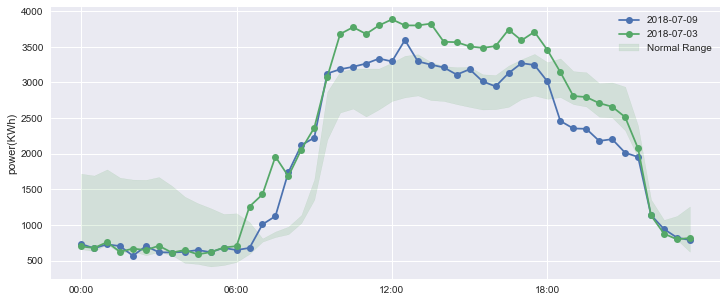

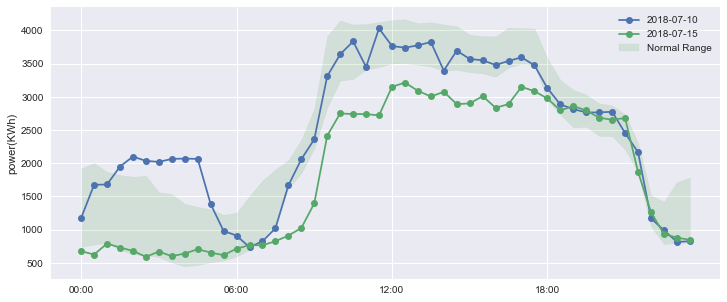

In [124]:
h, w = plot_ol_power_curve(data)

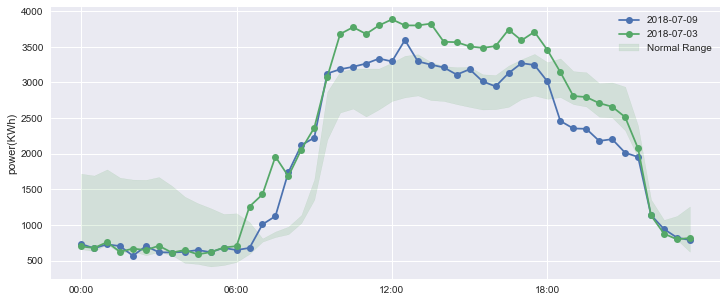

In [126]:
h